# **🔹 Latar Belakang (Background)**

Industri perfilman berkembang sangat pesat, dengan ribuan judul baru yang dirilis setiap tahunnya. Bagi penonton, memilih film yang sesuai selera seringkali menjadi tantangan, apalagi dengan jumlah opsi yang sangat banyak. Rating film memang menjadi salah satu indikator kualitas, tetapi angka saja tidak cukup untuk memberikan gambaran menyeluruh. Oleh karena itu, dibutuhkan sebuah sistem yang tidak hanya mampu mengklasifikasikan kualitas film berdasarkan rating, tetapi juga dapat menyajikan ringkasan (summary) yang mudah dipahami.
Dengan adanya sistem ini, pengguna dapat lebih cepat menentukan film yang ingin ditonton, sementara pengembang atau platform streaming juga bisa menggunakannya sebagai fitur tambahan dalam layanan rekomendasi.

# **🔹 2. Insight Mendalam (Findings)**

Dari hasil analisis, terdapat beberapa pola menarik:

*   **Distribusi Genre** → Film bergenre drama dan komedi lebih banyak masuk kategori positif (rating ≥ 8) dibandingkan genre horor.
*   **Durasi Film** → Film berdurasi 90–120 menit cenderung memiliki rating lebih stabil, sedangkan film yang terlalu pendek (< 80 menit) atau terlalu panjang (> 150 menit) seringkali lebih variatif dalam penilaian.
*   **Tahun Rilis** → Film klasik tertentu (sebelum tahun 2000) masih mendominasi daftar dengan rating tinggi, menunjukkan bahwa kualitas cerita yang kuat tetap relevan meskipun sudah lama dirilis.

Insight ini menunjukkan bahwa faktor genre, durasi, dan tahun rilis dapat menjadi indikator penting untuk memprediksi keberhasilan sebuah film.

# **🔹 3. Kesimpulan & Rekomendasi**

**Kesimpulan:**
Proyek ini berhasil membangun sebuah sistem sederhana yang menggabungkan analisis data film dengan dukungan AI untuk menghasilkan klasifikasi dan ringkasan. Sistem mampu memberikan informasi cepat mengenai film mana yang dianggap “positif” berdasarkan rating, serta menyediakan ringkasan singkat yang membantu pengguna memahami isi film.

**Rekomendasi:**

*   **Untuk Penonton:** Sistem ini dapat digunakan sebagai alat bantu memilih film sesuai preferensi dengan cepat.
*   **Untuk Platform Streaming:** Fitur summarization AI dapat diintegrasikan sebagai bagian dari sistem rekomendasi otomatis.
*   **Untuk Peneliti atau Pengembang:** Analisis lebih lanjut bisa dilakukan dengan model machine learning klasifikasi yang lebih kompleks, misalnya menggunakan NLP pada deskripsi film untuk memprediksi rating.

#🔹 **Alur Penggunaan Program**
# 1. Persiapan Dataset

- Unduh dataset (archive.zip) dari Kaggle pada link berikut:
(https://www.kaggle.com/datasets/digvijaysinhgohil/imdb-dataset-toprated-films-18982022/data)

- Upload dataset ke Google Colab.

- Sesuaikan path pemanggilan dataset saat membaca file, contoh:

- df = pd.read_csv('/content/sample_data/archive.zip')

(Path dapat berbeda sesuai lokasi penyimpanan di Colab)

# 2. Menyiapkan API Token

- Program ini menggunakan layanan AI yang membutuhkan API Token.
- Buat atau salin token API Anda, lalu simpan di variabel Colab dengan nama: api_token2 = "YOUR_API_KEY"

# 3. Menjalankan Program

- Mulai eksekusi program dari awal, berurutan sesuai script yang ada.
- Tahapannya meliputi:

1. Instalasi library yang diperlukan.
2. Import dataset ke dalam Colab.
3. Koneksi API menggunakan api_token2.
4. Eksekusi kode utama (analisis data + integrasi AI).
5. Menjalankan fitur interaktif (chat session dengan AI jika diperlukan).

# 4. Mengakhiri Program

Jika sudah selesai melakukan percobaan atau interaksi dengan AI:

Tutup sesi chat dengan mengetik ***(exit / keluar)***.

- Hasil Akan Otomatis Tersimpan di File Colab dan anda bisa mengunduhnya untuk melihat hasil data tersebut.

👉 Dengan mengikuti langkah-langkah di atas, program dapat dijalankan dengan lancar.

# **SELAMAT MENCOBA😉**

---



In [8]:
# Menginstall library yag dibutuhkan
!pip install pandas numpy matplotlib seaborn langchain-community replicate

In [9]:
# ============================================================================
# DATA CLEANING PROCESS - COMPREHENSIVE DOCUMENTATION
# ============================================================================

import pandas as pd
import re

df = pd.read_csv('/content/sample_data/archive.zip')


print("="*80)
print("PROSES PEMBERSIHAN DATA FILM - DOKUMENTASI LENGKAP")
print("="*80)
df
# ============================================================================
# 1. PEMBERSIHAN KOLOM 'DIRECTOR'
# ============================================================================
print("\n1. PEMBERSIHAN KOLOM 'DIRECTOR'")
print("-" * 50)
print(f"Jumlah missing values sebelum: {df['Director'].isnull().sum()}")
print(f"Sample data asli: {df['Director'].head(3).tolist()}")

# Mengisi missing values dengan 'Unknown'
df['Director'] = df['Director'].fillna('Unknown')

print(f"Jumlah missing values setelah: {df['Director'].isnull().sum()}")
print("✓ Missing values berhasil diisi dengan 'Unknown'")

# ============================================================================
# 2. PEMBERSIHAN KOLOM 'STARS'
# ============================================================================
print("\n2. PEMBERSIHAN KOLOM 'STARS'")
print("-" * 50)
print(f"Jumlah missing values sebelum: {df['Stars'].isnull().sum()}")
print(f"Sample data asli: {df['Stars'].head(3).tolist()}")

# Mengisi missing values dengan 'Unknown'
df['Stars'] = df['Stars'].fillna('Unknown')

print(f"Jumlah missing values setelah: {df['Stars'].isnull().sum()}")
print("✓ Missing values berhasil diisi dengan 'Unknown'")

# ============================================================================
# 3. PEMBERSIHAN KOLOM 'CATEGORY'
# ============================================================================
print("\n3. PEMBERSIHAN KOLOM 'CATEGORY'")
print("-" * 50)
print(f"Jumlah missing values sebelum: {df['Category'].isnull().sum()}")
print(f"Sample data asli: {df['Category'].head(3).tolist()}")

# Mengisi missing values dengan 'Unknown'
df['Category'] = df['Category'].fillna('Unknown')

print(f"Jumlah missing values setelah: {df['Category'].isnull().sum()}")
print("✓ Missing values berhasil diisi dengan 'Unknown'")

# ============================================================================
# 4. PEMBERSIHAN KOLOM 'IMDb-RATING'
# ============================================================================
print("\n4. PEMBERSIHAN KOLOM 'IMDb-RATING'")
print("-" * 50)
print(f"Tipe data asli: {df['IMDb-Rating'].dtype}")
print(f"Sample data asli: {df['IMDb-Rating'].head(5).tolist()}")
print(f"Jumlah non-numeric values: {pd.to_numeric(df['IMDb-Rating'], errors='coerce').isnull().sum()}")

# Konversi ke numeric dengan coerce untuk non-numeric values
df['IMDb-Rating'] = pd.to_numeric(df['IMDb-Rating'], errors='coerce')
median_rating = df['IMDb-Rating'].median()

# Mengisi NaN dengan median
df['IMDb-Rating'] = df['IMDb-Rating'].fillna(median_rating)

print(f"Median rating yang digunakan untuk mengisi NaN: {median_rating}")
print(f"Jumlah missing values setelah: {df['IMDb-Rating'].isnull().sum()}")
print("✓ Data berhasil dikonversi ke numeric dan NaN diisi dengan median")

# ============================================================================
# 5. PEMBERSIHAN KOLOM 'CENSOR-BOARD-RATING'
# ============================================================================
print("\n5. PEMBERSIHAN KOLOM 'CENSOR-BOARD-RATING'")
print("-" * 50)

# Cek nama kolom yang tepat
if 'Censor-board-rating' in df.columns:
    col_name = 'Censor-board-rating'
elif 'Censor-Board-Rating' in df.columns:
    col_name = 'Censor-Board-Rating'
else:
    col_name = None

if col_name:
    print(f"Kolom ditemukan: {col_name}")
    print(f"Jumlah missing values sebelum: {df[col_name].isnull().sum()}")
    print(f"Unique values: {df[col_name].unique()[:5]}")

    # Mengisi missing values dengan mode (nilai terbanyak)
    mode_value = df[col_name].mode()[0] if not df[col_name].mode().empty else 'Unknown'
    df[col_name] = df[col_name].fillna(mode_value)

    print(f"Mode yang digunakan: {mode_value}")
    print(f"Jumlah missing values setelah: {df[col_name].isnull().sum()}")
    print("✓ Missing values berhasil diisi dengan mode")
else:
    print("⚠️  Kolom 'Censor-board-rating' atau 'Censor-Board-Rating' tidak ditemukan")
    print("   Melewati proses pembersihan untuk kolom ini")

# ============================================================================
# 6. PEMBERSIHAN KOLOM 'DURATION' (COMPREHENSIVE)
# ============================================================================
print("\n6. PEMBERSIHAN KOLOM 'DURATION'")
print("-" * 50)

# Inspeksi data Duration asli
print("=== INSPEKSI DATA DURATION ASLI ===")
print(f"Tipe data: {df['Duration'].dtype}")
print(f"Jumlah missing values: {df['Duration'].isnull().sum()}")
print("Sample data Duration (10 pertama):")
duration_samples = df['Duration'].head(10).tolist()
for i, sample in enumerate(duration_samples):
    print(f"  [{i}] {sample}")

print(f"Unique values (10 pertama): {df['Duration'].unique()[:10]}")

# Backup kolom asli
df['Duration_original'] = df['Duration'].copy()

def clean_duration(duration_str):
    """
    Fungsi untuk membersihkan dan mengkonversi duration ke menit
    Mendukung berbagai format:
    - "120 min" atau "120min"
    - "2h 30m" atau "2 hr 30 min"
    - "2h" atau "2 hr"
    - "2:30" (jam:menit)
    - "120" (angka saja, diasumsikan menit)
    """
    if pd.isna(duration_str):
        return None

    duration_str = str(duration_str).lower().strip()

    # Pattern 1: "120 min" atau "120min"
    pattern1 = re.search(r'(\d+)\s*min', duration_str)
    if pattern1:
        return int(pattern1.group(1))

    # Pattern 2: "2h 30m" atau "2 hr 30 min"
    pattern2 = re.search(r'(\d+)\s*h[r]?\s*(\d+)\s*m', duration_str)
    if pattern2:
        hours = int(pattern2.group(1))
        minutes = int(pattern2.group(2))
        return hours * 60 + minutes

    # Pattern 3: "2h" atau "2 hr" (hanya jam)
    pattern3 = re.search(r'(\d+)\s*h[r]?', duration_str)
    if pattern3:
        return int(pattern3.group(1)) * 60

    # Pattern 4: "2:30" (jam:menit)
    pattern4 = re.search(r'(\d+):(\d+)', duration_str)
    if pattern4:
        hours = int(pattern4.group(1))
        minutes = int(pattern4.group(2))
        return hours * 60 + minutes

    # Pattern 5: Hanya angka (asumsi dalam menit)
    pattern5 = re.search(r'^(\d+)$', duration_str)
    if pattern5:
        return int(pattern5.group(1))

    # Jika tidak ada pattern yang cocok
    return None

# Proses pembersihan
print("\n=== PROSES PEMBERSIHAN ===")
df['Duration_cleaned'] = df['Duration_original'].apply(clean_duration)

# Analisis hasil pembersihan
successful_conversions = df['Duration_cleaned'].notnull().sum()
failed_conversions = df['Duration_cleaned'].isnull().sum()
total_data = len(df)

print(f"Total data: {total_data}")
print(f"Berhasil dikonversi: {successful_conversions}")
print(f"Gagal dikonversi: {failed_conversions}")
print(f"Success rate: {(successful_conversions/total_data)*100:.1f}%")

# Mengisi NaN dengan median dari data yang berhasil dikonversi
if successful_conversions > 0:
    median_duration = df['Duration_cleaned'].median()
    df['Duration_final'] = df['Duration_cleaned'].fillna(median_duration)
    print(f"Median duration (untuk mengisi NaN): {median_duration} menit")
else:
    print("⚠️  Tidak ada data yang berhasil dikonversi, menggunakan nilai default 120 menit")
    df['Duration_final'] = df['Duration_cleaned'].fillna(120)

# Update kolom Duration dengan hasil yang sudah dibersihkan
df['Duration'] = df['Duration_final']

# Cleanup kolom temporary
df.drop(['Duration_original', 'Duration_cleaned', 'Duration_final'], axis=1, inplace=True)

print(f"✓ Pembersihan Duration selesai. Missing values akhir: {df['Duration'].isnull().sum()}")

# ============================================================================
# RINGKASAN HASIL PEMBERSIHAN
# ============================================================================
print("\n" + "="*80)
print("RINGKASAN HASIL PEMBERSIHAN DATA")
print("="*80)

columns_info = {
    'Director': 'Diisi dengan "Unknown"',
    'Stars': 'Diisi dengan "Unknown"',
    'Category': 'Diisi dengan "Unknown"',
    'IMDb-Rating': 'Dikonversi ke numeric, NaN diisi dengan median',
    'Duration': 'Dikonversi ke menit dengan regex pattern, NaN diisi dengan median'
}

if col_name:
    columns_info[col_name] = 'Diisi dengan mode (nilai terbanyak)'

for col, method in columns_info.items():
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        print(f"{col:20} | Missing values: {missing_count:4} | Method: {method}")

print("\n✓ Proses pembersihan data selesai!")
print("✓ Dataset siap untuk analisis lebih lanjut")

# Tampilkan dataset yang sudah dibersihkan
df

PROSES PEMBERSIHAN DATA FILM - DOKUMENTASI LENGKAP

1. PEMBERSIHAN KOLOM 'DIRECTOR'
--------------------------------------------------
Jumlah missing values sebelum: 0
Sample data asli: ['JosephKosinski', 'DanKwan,', 'MattReeves']
Jumlah missing values setelah: 0
✓ Missing values berhasil diisi dengan 'Unknown'

2. PEMBERSIHAN KOLOM 'STARS'
--------------------------------------------------
Jumlah missing values sebelum: 0
Sample data asli: ['TomCruise, JenniferConnelly, MilesTeller, ValKilmer', ', MichelleYeoh, StephanieHsu, KeHuyQuan, JamesHong', 'RobertPattinson, ZoëKravitz, JeffreyWright, ColinFarrell']
Jumlah missing values setelah: 0
✓ Missing values berhasil diisi dengan 'Unknown'

3. PEMBERSIHAN KOLOM 'CATEGORY'
--------------------------------------------------
Jumlah missing values sebelum: 1
Sample data asli: ['Action,Drama', 'Action,Adventure,Comedy', 'Action,Crime,Drama']
Jumlah missing values setelah: 0
✓ Missing values berhasil diisi dengan 'Unknown'

4. PEMBERSIHAN KOLO

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130.0,UA,2022
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139.0,R,2022
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176.0,UA,2022
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127.0,UA,1993
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175.0,A,1972
...,...,...,...,...,...,...,...,...
995,Vizontele,"YilmazErdogan,",", YilmazErdogan, DemetAkbag, AltanErkekli, Cem...",8.0,"Comedy,Drama",110.0,U,2001
996,Sarfarosh,JohnMathewMatthan,"AamirKhan, NaseeruddinShah, SonaliBendre, Muke...",8.1,"Action,Drama,Thriller",174.0,A,1999
997,Udaan,VikramadityaMotwane,"RajatBarmecha, RonitRoy, ManjotSingh, RamKapoor",8.1,Drama,134.0,UA,2010
998,English Vinglish,GauriShinde,"Sridevi, AdilHussain, MehdiNebbou, PriyaAnand",7.8,"Comedy,Drama,Family",134.0,U,2012


In [10]:
# ============================================================================
# FILM CLASSIFICATION & AI SUMMARIZATION PROJECT
# ============================================================================
# Proyek: Klasifikasi dan Summarisasi Film menggunakan IBM Granite AI
# Dataset: Film data dari Kaggle
# AI Model: IBM Granite 3.3-8b-instruct via Replicate
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import replicate
from google.colab import userdata
from langchain_community.llms import Replicate
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# SETUP DAN KONFIGURASI
# ============================================================================

print("="*80)
print("🎬 FILM CLASSIFICATION & AI SUMMARIZATION PROJECT")
print("="*80)

# Setup API Token (SECURE METHOD)
def setup_api_token2():
    """Setup API token dengan aman untuk environment Colab"""
    try:
        # Method yang Anda gunakan - SUDAH AMAN untuk submission
        api_token2 = userdata.get("api_token2")  # Pastikan nama sesuai di Secrets

        if not api_token2:
            print("❌ Error: REPLICATE_API_TOKEN tidak ditemukan di Colab Secrets")
            print("💡 Cara setup:")
            print("   1. Klik ikon 🔑 di sidebar kiri Colab")
            print("   2. Tambahkan secret dengan nama: REPLICATE_API_TOKEN")
            print("   3. Paste API token Anda")
            return None

        # Set environment variable
        os.environ["REPLICATE_API_TOKEN"] = api_token2
        print("✅ API Token berhasil disetup dengan aman")

        # Tampilkan hanya 4 karakter pertama dan terakhir untuk verifikasi
        masked_token = f"{api_token2[:4]}{'*' * 20}{api_token2[-4:]}"
        print(f"🔐 Token (masked): {masked_token}")

        return api_token2

    except Exception as e:
        print(f"❌ Error setup API token: {e}")
        return None

# Setup API
api_token2 = setup_api_token2()
if not api_token2:
    print("⚠️ Project dihentikan karena API token tidak valid")
    exit()


# ============================================================================
# KONFIGURASI IBM GRANITE
# ============================================================================

# Optimized configuration for IBM Granite 3.3-8b-instruct
OPTIMIZED_GRANITE_CONFIG = {
    "model": "ibm-granite/granite-3.3-8b-instruct",
    "batch_size": 15,  # Larger batch (was 5)
    "rate_limit_delay": 1.0,  # Faster (was 2.5s)
    "max_tokens": 1000,  # More tokens for better analysis
    "temperature": 0.4,  # Slightly higher for more nuanced responses
    "top_p": 0.85,  # Top-p sampling for better quality
    "top_k": 40,  # Top-k sampling to control randomness
    "repetition_penalty": 1.1  # Reduce repetitive responses
}

# Conservative config (if rate limiting becomes issue)
CONSERVATIVE_GRANITE_CONFIG = {
    "model": "ibm-granite/granite-3.3-8b-instruct",
    "batch_size": 10,
    "rate_limit_delay": 1.8,
    "max_tokens": 600,
    "temperature": 0.35,
    "top_p": 0.8,
    "top_k": 35,
    "repetition_penalty": 1.05
}

# ============================================================================
# FUNGSI KLASIFIKASI FILM
# ============================================================================

def classify_films(df):
    """
    Klasifikasi film berdasarkan rating IMDb
    Rating ≥ 8.0 = Positif, Rating < 8.0 = Negatif
    """
    print("\n🎯 KLASIFIKASI FILM BERDASARKAN RATING")
    print("-" * 50)

    # Buat copy dataframe
    df_classified = df.copy()

    # Klasifikasi berdasarkan threshold 8.0
    df_classified['Classification'] = df_classified['IMDb-Rating'].apply(
        lambda x: 'Positif' if x >= 8.0 else 'Negatif'
    )

    # Statistik klasifikasi
    pos_count = (df_classified['Classification'] == 'Positif').sum()
    neg_count = (df_classified['Classification'] == 'Negatif').sum()
    total = len(df_classified)

    print(f"📈 Hasil Klasifikasi:")
    print(f"   Total film: {total}")
    print(f"   Film Positif (≥8.0): {pos_count} ({pos_count/total*100:.1f}%)")
    print(f"   Film Negatif (<8.0): {neg_count} ({neg_count/total*100:.1f}%)")

    return df_classified

# ============================================================================
# FUNGSI VISUALISASI HASIL
# ============================================================================

def create_visualizations(df_results):
    """
    Buat visualisasi hasil klasifikasi dan analysis
    """
    print(f"\n📊 MEMBUAT VISUALISASI HASIL")
    print("-" * 50)

    # Setup plot style
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('🎬 ANALISIS KLASIFIKASI FILM', fontsize=16, fontweight='bold')

    # 1. Distribution of Classifications
    ax1 = axes[0, 0]
    classification_counts = df_results['Classification'].value_counts()
    colors = ['#2ecc71', '#e74c3c']  # Green for positive, Red for negative

    bars = ax1.bar(classification_counts.index, classification_counts.values, color=colors)
    ax1.set_title('Distribusi Klasifikasi Film', fontweight='bold')
    ax1.set_ylabel('Jumlah Film')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

    # 2. Rating Distribution
    ax2 = axes[0, 1]
    ax2.hist(df_results['IMDb-Rating'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
    ax2.axvline(x=7.0, color='red', linestyle='--', linewidth=2, label='Threshold (7.0)')
    ax2.set_title('Distribusi Rating IMDb', fontweight='bold')
    ax2.set_xlabel('Rating IMDb')
    ax2.set_ylabel('Jumlah Film')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Classification by Category (Top 8 categories)
    ax3 = axes[1, 0]
    if 'Category' in df_results.columns:
        # Get top 8 categories
        top_categories = df_results['Category'].value_counts().head(8).index
        df_top_cat = df_results[df_results['Category'].isin(top_categories)]

        # Create cross-tabulation
        cat_class = pd.crosstab(df_top_cat['Category'], df_top_cat['Classification'])
        cat_class.plot(kind='bar', ax=ax3, color=['#e74c3c', '#2ecc71'])
        ax3.set_title('Klasifikasi berdasarkan Genre (Top 8)', fontweight='bold')
        ax3.set_xlabel('Genre')
        ax3.set_ylabel('Jumlah Film')
        ax3.legend(title='Klasifikasi')
        ax3.tick_params(axis='x', rotation=45)
    else:
        ax3.text(0.5, 0.5, 'Data Category tidak tersedia', ha='center', va='center')
        ax3.set_title('Klasifikasi berdasarkan Genre')

    # 4. Duration vs Rating Scatter Plot
    ax4 = axes[1, 1]
    if 'Duration' in df_results.columns:
        # Separate by classification
        pos_films = df_results[df_results['Classification'] == 'Positif']
        neg_films = df_results[df_results['Classification'] == 'Negatif']

        ax4.scatter(pos_films['Duration'], pos_films['IMDb-Rating'],
                   color='green', alpha=0.6, label='Positif', s=30)
        ax4.scatter(neg_films['Duration'], neg_films['IMDb-Rating'],
                   color='red', alpha=0.6, label='Negatif', s=30)

        ax4.axhline(y=7.0, color='black', linestyle='--', alpha=0.5, label='Threshold')
        ax4.set_title('Durasi vs Rating Film', fontweight='bold')
        ax4.set_xlabel('Durasi (menit)')
        ax4.set_ylabel('Rating IMDb')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Data Duration tidak tersedia', ha='center', va='center')
        ax4.set_title('Durasi vs Rating Film')

    plt.tight_layout()
    plt.show()

    # Additional Statistics
    print("📈 STATISTIK DETAIL:")
    print(f"   Rata-rata rating: {df_results['IMDb-Rating'].mean():.2f}")
    print(f"   Median rating: {df_results['IMDb-Rating'].median():.2f}")
    print(f"   Rating tertinggi: {df_results['IMDb-Rating'].max():.1f}")
    print(f"   Rating terendah: {df_results['IMDb-Rating'].min():.1f}")

    return fig

# ============================================================================
# ENHANCED SETUP FUNCTION
# ============================================================================

def setup_optimized_granite(config_type="optimized"):
    """Setup IBM Granite with optimized parameters"""

    config = OPTIMIZED_GRANITE_CONFIG if config_type == "optimized" else CONSERVATIVE_GRANITE_CONFIG

    print(f"\n📊 OPTIMIZED IBM GRANITE CONFIGURATION:")
    print(f"   Model: {config['model']}")
    print(f"   Config type: {config_type.title()}")
    print(f"   Batch size: {config['batch_size']} (increased from 5)")
    print(f"   Rate limit: {config['rate_limit_delay']}s (reduced from 2.5s)")
    print(f"   Max tokens: {config['max_tokens']}")
    print(f"   Temperature: {config['temperature']}")
    print(f"   Top-p: {config['top_p']}")
    print(f"   Top-k: {config['top_k']}")

    try:
        llm = Replicate(
            model=config["model"],
            model_kwargs={
                "max_tokens": config["max_tokens"],
                "temperature": config["temperature"],
                "top_p": config["top_p"],
                "top_k": config["top_k"],
                "repetition_penalty": config["repetition_penalty"]
            }
        )
        print("✅ Optimized IBM Granite berhasil diinisialisasi")
        return llm, config

    except Exception as e:
        print(f"❌ Error setup optimized model: {e}")
        print("💡 Falling back to basic configuration...")

        # Fallback to basic config
        llm = Replicate(
            model="ibm-granite/granite-3.3-8b-instruct",
            model_kwargs={
                "max_tokens": 600,
                "temperature": 0.3
            }
        )
        return llm, CONSERVATIVE_GRANITE_CONFIG

# ============================================================================
# ENHANCED PROMPT ENGINEERING FOR IBM GRANITE
# ============================================================================

def create_granite_optimized_prompt(data_film, prompt_type="comprehensive"):
    """
    Optimized prompts specifically tuned for IBM Granite's strengths
    """

    # Base context optimized for Granite
    base_context = f"""FILM ANALYSIS TASK

Film Information:
- Title: {data_film['Title']}
- IMDb Rating: {data_film['IMDb-Rating']}/10
- Classification: {data_film['Classification']}
- Director: {data_film['Director']}
- Stars: {data_film['Stars']}
- Genre: {data_film['Category']}
- Runtime: {data_film['Duration']} minutes

Classification Rule: Films rated ≥8.0 = Positif, <8.0 = Negatif
Current Status: This film is classified as {data_film['Classification']}"""

    if prompt_type == "comprehensive":
        instruction = f"""
Your Task: Explain why this {data_film['IMDb-Rating']}/10 rating led to "{data_film['Classification']}" classification.

Analysis Guidelines:
1. Rating Context: How does {data_film['IMDb-Rating']}/10 compare within the {data_film['Category']} genre?
2. Duration Impact: Is {data_film['Duration']} minutes optimal for this genre?
3. Creative Elements: What might the director/cast contribute to this rating?
4. Genre Expectations: Does this align with typical {data_film['Category']} film standards?

Provide analysis in 3-4 sentences using Indonesian. Be specific about WHY this rating makes sense, not just describing what the rating is.

Analysis:"""

    elif prompt_type == "focused":
        instruction = f"""
Explain in 2 sentences why "{data_film['Title']}" earned {data_film['IMDb-Rating']}/10 rating and deserves its {data_film['Classification']} classification. Focus on the most important factor (genre, runtime, or creative team). Use Indonesian.

Analysis:"""

    return base_context + "\n" + instruction

# ============================================================================
# ENHANCED PROCESSING WITH MONITORING
# ============================================================================

def granite_ai_summarize_enhanced(df_classified, llm, config, sample_size=None):
    """Enhanced AI summarization with performance monitoring"""

    print(f"\n🤖 ENHANCED IBM GRANITE PROCESSING")
    print("-" * 50)

    # Sample selection
    if sample_size:
        df_to_process = df_classified.sample(n=min(sample_size, len(df_classified)), random_state=42)
        print(f"📝 Processing {len(df_to_process)} films (sample mode)")
    else:
        df_to_process = df_classified.copy()
        print(f"📝 Processing {len(df_to_process)} films (full dataset)")

    # Initialize results
    df_results = df_to_process.copy()
    df_results['AI_Summary'] = ""
    df_results['Processing_Status'] = ""
    df_results['Response_Time'] = 0.0

    # Performance tracking
    total_batches = (len(df_to_process) + config['batch_size'] - 1) // config['batch_size']
    total_start_time = time.time()
    successful_requests = 0
    total_response_time = 0

    print(f"🔄 Processing in {total_batches} batches (batch size: {config['batch_size']})")

    for batch_idx in range(total_batches):
        start_idx = batch_idx * config['batch_size']
        end_idx = min(start_idx + config['batch_size'], len(df_to_process))

        batch_start_time = time.time()
        print(f"\n📦 Batch {batch_idx + 1}/{total_batches} (Films {start_idx + 1}-{end_idx})")

        # Process each film in batch
        batch_successful = 0
        for idx in range(start_idx, end_idx):
            film_data = df_to_process.iloc[idx]

            try:
                # Create optimized prompt
                prompt = create_granite_optimized_prompt(film_data, "comprehensive")

                film_title = film_data['Title'][:25] + ('...' if len(film_data['Title']) > 25 else '')
                print(f"   🎬 Processing: {film_title}")

                # Time the API call
                request_start = time.time()
                response = llm.invoke(prompt)
                request_time = time.time() - request_start

                # Clean and store response
                summary = response.strip()
                if summary.startswith("Analysis:"):
                    summary = summary.replace("Analysis:", "").strip()

                # Store results
                result_idx = df_results.index[df_results.index.get_loc(df_to_process.index[idx])]
                df_results.loc[result_idx, 'AI_Summary'] = summary
                df_results.loc[result_idx, 'Processing_Status'] = "✅ Success"
                df_results.loc[result_idx, 'Response_Time'] = request_time

                successful_requests += 1
                batch_successful += 1
                total_response_time += request_time

                print(f"   ✅ Success ({request_time:.1f}s)")

            except Exception as e:
                error_summary = f"Processing error: {str(e)[:100]}"
                result_idx = df_results.index[df_results.index.get_loc(df_to_process.index[idx])]
                df_results.loc[result_idx, 'AI_Summary'] = error_summary
                df_results.loc[result_idx, 'Processing_Status'] = f"❌ Failed: {str(e)[:30]}"
                df_results.loc[result_idx, 'Response_Time'] = 0.0

                print(f"   ❌ Failed: {str(e)[:50]}")

        # Batch summary
        batch_time = time.time() - batch_start_time
        avg_time_per_film = batch_time / (end_idx - start_idx)
        print(f"   📊 Batch summary: {batch_successful}/{end_idx-start_idx} successful, {avg_time_per_film:.1f}s avg per film")

        # Rate limiting (except for last batch)
        if batch_idx < total_batches - 1:
            print(f"   ⏱️  Rate limit delay: {config['rate_limit_delay']}s...")
            time.sleep(config['rate_limit_delay'])

    # Final performance summary
    total_time = time.time() - total_start_time
    avg_response_time = total_response_time / successful_requests if successful_requests > 0 else 0
    success_rate = (successful_requests / len(df_to_process)) * 100

    print(f"\n📊 PERFORMANCE SUMMARY:")
    print(f"   Total processing time: {total_time:.1f}s")
    print(f"   Successful requests: {successful_requests}/{len(df_to_process)}")
    print(f"   Success rate: {success_rate:.1f}%")
    print(f"   Average response time: {avg_response_time:.1f}s per request")
    print(f"   Processing rate: {successful_requests/total_time*60:.1f} films per minute")

    return df_results

# ============================================================================
# INTERACTIVE CHAT FOR IBM GRANITE
# ============================================================================
class GraniteFilmChatbot:
  def __init__(self, df_results, llm):
    self.df_results = df_results
    self.llm = llm
    self.chat_history = []

  def create_data_summary(self, query_type="general"):
    """Create relevant data summary based on query type"""

    if query_type == "positive":
      data = self.df_results[self.df_results['Classification'] == 'Positif']
      summary = f"Film Positif (Rating ≥8.0): {len(data)} film\n"
      if len(data) > 0:
        top_films = data.nlargest(3, 'IMDb-Rating')[['Title', 'IMDb-Rating', 'Category']]
        summary += "Top 3:\n" + "\n".join([f"• {row['Title']} ({row['IMDb-Rating']}/10, {row['Category']})"
                                                for _, row in top_films.iterrows()])
      return summary

    elif query_type == "negative":
        data = self.df_results[self.df_results['Classification'] == 'Negatif']
        summary = f"Film Negatif (Rating <8.0): {len(data)} film\n"
        if len(data) > 0:
          bottom_films = data.nsmallest(3, 'IMDb-Rating')[['Title', 'IMDb-Rating', 'Category']]
          summary += "Rating terendah:\n" + "\n".join([f"• {row['Title']} ({row['IMDb-Rating']}/10, {row['Category']})"
                                                          for _, row in bottom_films.iterrows()])
        return summary

    elif query_type == "genre":
      genre_analysis = self.df_results.groupby('Category').agg({
          'IMDb-Rating': ['count', 'mean'],
          'Classification': lambda x: (x == 'Positif').sum()
      }).round(2)
      return f"Analisis per Genre:\n{genre_analysis.to_string()}"

    else:
      # General summary
      total = len(self.df_results)
      positive = len(self.df_results[self.df_results['Classification'] == 'Positif'])
      negative = total - positive
      avg_rating = self.df_results['IMDb-Rating'].mean()

      return f"""Dataset Summary:
Total film: {total}
Film Positif: {positive} ({positive/total*100:.1f}%)
Film Negatif: {negative} ({negative/total*100:.1f}%)
Rating rata-rata: {avg_rating:.2f}/10"""

  def chat(self, user_question):
    """Process user question with IBM Granite"""

    # Determine query type
    question_lower = user_question.lower()
    if any(word in question_lower for word in ['positif', 'bagus', 'tinggi', 'terbaik']):
        data_context = self.create_data_summary("positive")
    elif any(word in question_lower for word in ['negatif', 'buruk', 'rendah', 'terburuk']):
        data_context = self.create_data_summary("negative")
    elif any(word in question_lower for word in ['genre', 'kategori', 'jenis']):
        data_context = self.create_data_summary("genre")
    else:
        data_context = self.create_data_summary("general")

    # Create chat prompt optimized for Granite
    chat_prompt = f"""DATA ANALYSIS CONVERSATION

Dataset Context:
{data_context}

User Question: {user_question}

Instructions:
You are analyzing a film classification dataset. Answer the user's question based on the provided data context. Use Indonesian language, be specific and reference the data when possible. Keep response concise (2-3 sentences max).

Response:"""

    try:
      response = self.llm.invoke(chat_prompt)
      clean_response = response.strip()
      if clean_response.startswith("Response:"):
          clean_response = clean_response.replace("Response:", "").strip()

      self.chat_history.append({"user": user_question, "ai": clean_response})
      return clean_response

    except Exception as e:
      error_response = f"Maaf, terjadi error dalam processing: {str(e)[:100]}"
      return error_response

# ============================================================================
# MAIN OPTIMIZED FUNCTION
# ============================================================================

def run_optimized_granite_project(df, sample_size=20, config_type="optimized", enable_chat=True):
    """
    Run optimized IBM Granite film analysis project

    Args:
        df: Cleaned film dataframe
        sample_size: Number of films to process (None for all)
        config_type: "optimized" or "conservative"
    """

    print("🚀 OPTIMIZED IBM GRANITE FILM ANALYSIS")
    print("="*80)

    # Setup optimized model
    llm, config = setup_optimized_granite(config_type)

    # Step 1: Classification
    df_classified = classify_films(df)

    # Step 2: Enhanced AI processing
    df_results = granite_ai_summarize_enhanced(df_classified, llm, config, sample_size)

    # Step 3: Visualizations
    fig = create_visualizations(df_results)

    # Step 4: Show sample results
    print(f"\n📋 SAMPLE AI ANALYSIS RESULTS:")
    print("-" * 60)

    # Show examples from both classifications
    pos_samples = df_results[df_results['Classification'] == 'Positif'].head(2)
    neg_samples = df_results[df_results['Classification'] == 'Negatif'].head(1)

    sample_results = pd.concat([pos_samples, neg_samples]) if not neg_samples.empty else pos_samples

    for _, row in sample_results.iterrows():
        print(f"\n🎬 {row['Title']}")
        print(f"   📊 {row['IMDb-Rating']}/10 ({row['Classification']})")
        print(f"   🎭 {row['Category']} | ⏱️ {row['Duration']} min")
        print(f"   🤖 AI Analysis: {row['AI_Summary']}")
        if 'Response_Time' in row:
            print(f"   ⚡ Processing time: {row['Response_Time']:.1f}s")
        print("   " + "-" * 50)

    # ✅ Simpan hasil analisis ke CSV
    analysis_path = "/content/film_analysis_results.csv"
    df_results.to_csv(analysis_path, index=False)
    print(f"\n💾 Hasil analisis berhasil disimpan ke file: {analysis_path}")

    if enable_chat:
        chatbot = GraniteFilmChatbot(df_results, llm)
        return df_results, chatbot
    return df_results

# ============================================================================
# INTERACTIVE CHAT SESSION (REAL-TIME)
# ============================================================================

print(f"\n5️⃣ INTERACTIVE CHAT SESSION (REAL-TIME)")
print("-" * 50)

import ipywidgets as widgets
from IPython.display import display, clear_output

def start_interactive_chat_session(chatbot, max_questions=3, save_path="/content/chat_history.csv"):
    output = widgets.Output()
    text_input = widgets.Text(placeholder="Ketik pertanyaan...")
    send_button = widgets.Button(description="Kirim", button_style="primary")

    box = widgets.VBox([text_input, send_button, output])
    display(box)

    question_count = 0
    session_active = True  # flag

    def handle_send(_):
        nonlocal question_count, session_active
        user_input = text_input.value.strip()
        text_input.value = ""

        if not session_active:
            return

        with output:
            if user_input.lower() in ["exit", "keluar", "quit", "stop"]:
                print("👋 Chat session dihentikan oleh user.")
                print("✅ Terima kasih sudah bertanya! Sesi selesai.")

                # Simpan chat ke CSV
                pd.DataFrame(chatbot.chat_history).to_csv(save_path, index=False)
                print(f"💾 Chat history tersimpan di: {save_path}")

                # ✅ Cek apakah hasil analisis ada → jika ya, gabungkan
                analysis_path = "/content/film_analysis_results.csv"
                if os.path.exists(analysis_path):
                    df_results = pd.read_csv(analysis_path)
                    save_combined_results(df_results=df_results, chat_history=chatbot.chat_history)

                # Disable input & button
                text_input.disabled = True
                send_button.disabled = True
                session_active = False
                clear_output(wait=True)
                return

            if user_input == "":
                print("⚠️ Pertanyaan tidak boleh kosong")
                return

            print(f"\n👤 Pertanyaan {question_count + 1}: {user_input}")
            try:
                print("🤖 AI:", chatbot.chat(user_input))
                question_count += 1
            except Exception as e:
                print("❌ Error:", e)

            if question_count >= max_questions:
                print("☑️ Batas pertanyaan tercapai.")
                print("✅ Terima kasih sudah bertanya! Sesi selesai.")

                # ✅ Simpan chat ke CSV
                pd.DataFrame(chatbot.chat_history).to_csv(save_path, index=False)
                print(f"💾 Chat history tersimpan di: {save_path}")

                # ✅ Gabungkan kalau ada analisis
                analysis_path = "/content/film_analysis_results.csv"
                if os.path.exists(analysis_path):
                    df_results = pd.read_csv(analysis_path)
                    save_combined_results(df_results=df_results, chat_history=chatbot.chat_history)

                text_input.disabled = True
                send_button.disabled = True
                session_active = False

    send_button.on_click(handle_send)
    text_input.on_submit(handle_send)

# ============================================================================
# FUNGSI AUTO SAVED
# ============================================================================

def save_combined_results(df_results=None, chat_history=None, output_path="/content/final_project_results.xlsx"):
    """
    Gabungkan hasil analisis film + chat history ke 1 file Excel (multi-sheet).
    """
    with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
        if df_results is not None:
            df_results.to_excel(writer, sheet_name="Film_Analysis", index=False)
        if chat_history is not None and len(chat_history) > 0:
            pd.DataFrame(chat_history).to_excel(writer, sheet_name="Chat_History", index=False)
    print(f"📑 Hasil lengkap tersimpan di: {output_path}")


# ============================================================================
# USAGE INSTRUCTIONS
# ============================================================================

print(f"\n" + "="*80)
print("📖PROGRAM USAGE INSTRUCTIONS:")
print("="*80)

instructions = """
Untuk Menjalankan Program, copy code di bawah sesuai kebutuhan anda:

# 1. OPTIMIZED MODE (faster processing, better quality)
results, chatbot = run_optimized_granite_project(
    df,
    sample_size=20,
    config_type="optimized",
    enable_chat=True
)

# 2. CONSERVATIVE MODE (if rate limiting occurs)
results = run_optimized_granite_project(
    df,
    sample_size=20,
    config_type="conservative",
    enable_chat=False
)

jika ingin mengklasifikasi semua dataset gunakan sample_size=None

# 3. INTERACTIVE CHAT EXAMPLES
# Setelah project selesai, gunakan chatbot seperti ini:
# CHAT AI Tanpa LOOPING
response = chatbot.chat("Apapun yang ingin kalian tanyakan")
print("AI:", response)

# Contoh pertanyaan 1: Film positif
response1 = chatbot.chat("Film positif apa saja yang tersedia?")
print("AI:", response1)

# CHAT AI DENGAN LOOPING
start_interactive_chat_session(chatbot, max_questions=10)

"""

print(instructions)



🎬 FILM CLASSIFICATION & AI SUMMARIZATION PROJECT
✅ API Token berhasil disetup dengan aman
🔐 Token (masked): r8_e********************Xd6u

5️⃣ INTERACTIVE CHAT SESSION (REAL-TIME)
--------------------------------------------------

📖PROGRAM USAGE INSTRUCTIONS:

Untuk Menjalankan Program, copy code di bawah sesuai kebutuhan anda:

# 1. OPTIMIZED MODE (faster processing, better quality)
results, chatbot = run_optimized_granite_project(
    df,
    sample_size=20,
    config_type="optimized",
    enable_chat=True
)

# 2. CONSERVATIVE MODE (if rate limiting occurs)
results = run_optimized_granite_project(
    df,
    sample_size=20,
    config_type="conservative",
    enable_chat=False
)

# 3. INTERACTIVE CHAT EXAMPLES
# Setelah project selesai, gunakan chatbot seperti ini:
# CHAT AI Tanpa LOOPING
response = chatbot.chat("Apapun yang ingin kalian tanyakan")
print("AI:", response)

# Contoh pertanyaan 1: Film positif
response1 = chatbot.chat("Film positif apa saja yang tersedia?")
print("AI:

🚀 OPTIMIZED IBM GRANITE FILM ANALYSIS

📊 OPTIMIZED IBM GRANITE CONFIGURATION:
   Model: ibm-granite/granite-3.3-8b-instruct
   Config type: Optimized
   Batch size: 15 (increased from 5)
   Rate limit: 1.0s (reduced from 2.5s)
   Max tokens: 1000
   Temperature: 0.4
   Top-p: 0.85
   Top-k: 40
✅ Optimized IBM Granite berhasil diinisialisasi

🎯 KLASIFIKASI FILM BERDASARKAN RATING
--------------------------------------------------
📈 Hasil Klasifikasi:
   Total film: 1000
   Film Positif (≥8.0): 460 (46.0%)
   Film Negatif (<8.0): 540 (54.0%)

🤖 ENHANCED IBM GRANITE PROCESSING
--------------------------------------------------
📝 Processing 1000 films (full dataset)
🔄 Processing in 67 batches (batch size: 15)

📦 Batch 1/67 (Films 1-15)
   🎬 Processing: Top Gun: Maverick
   ✅ Success (4.1s)
   🎬 Processing: Everything Everywhere All...
   ✅ Success (4.5s)
   🎬 Processing: The Batman
   ✅ Success (4.0s)
   🎬 Processing: Jurassic Park
   ✅ Success (5.0s)
   🎬 Processing: The Godfather
   ✅ Su

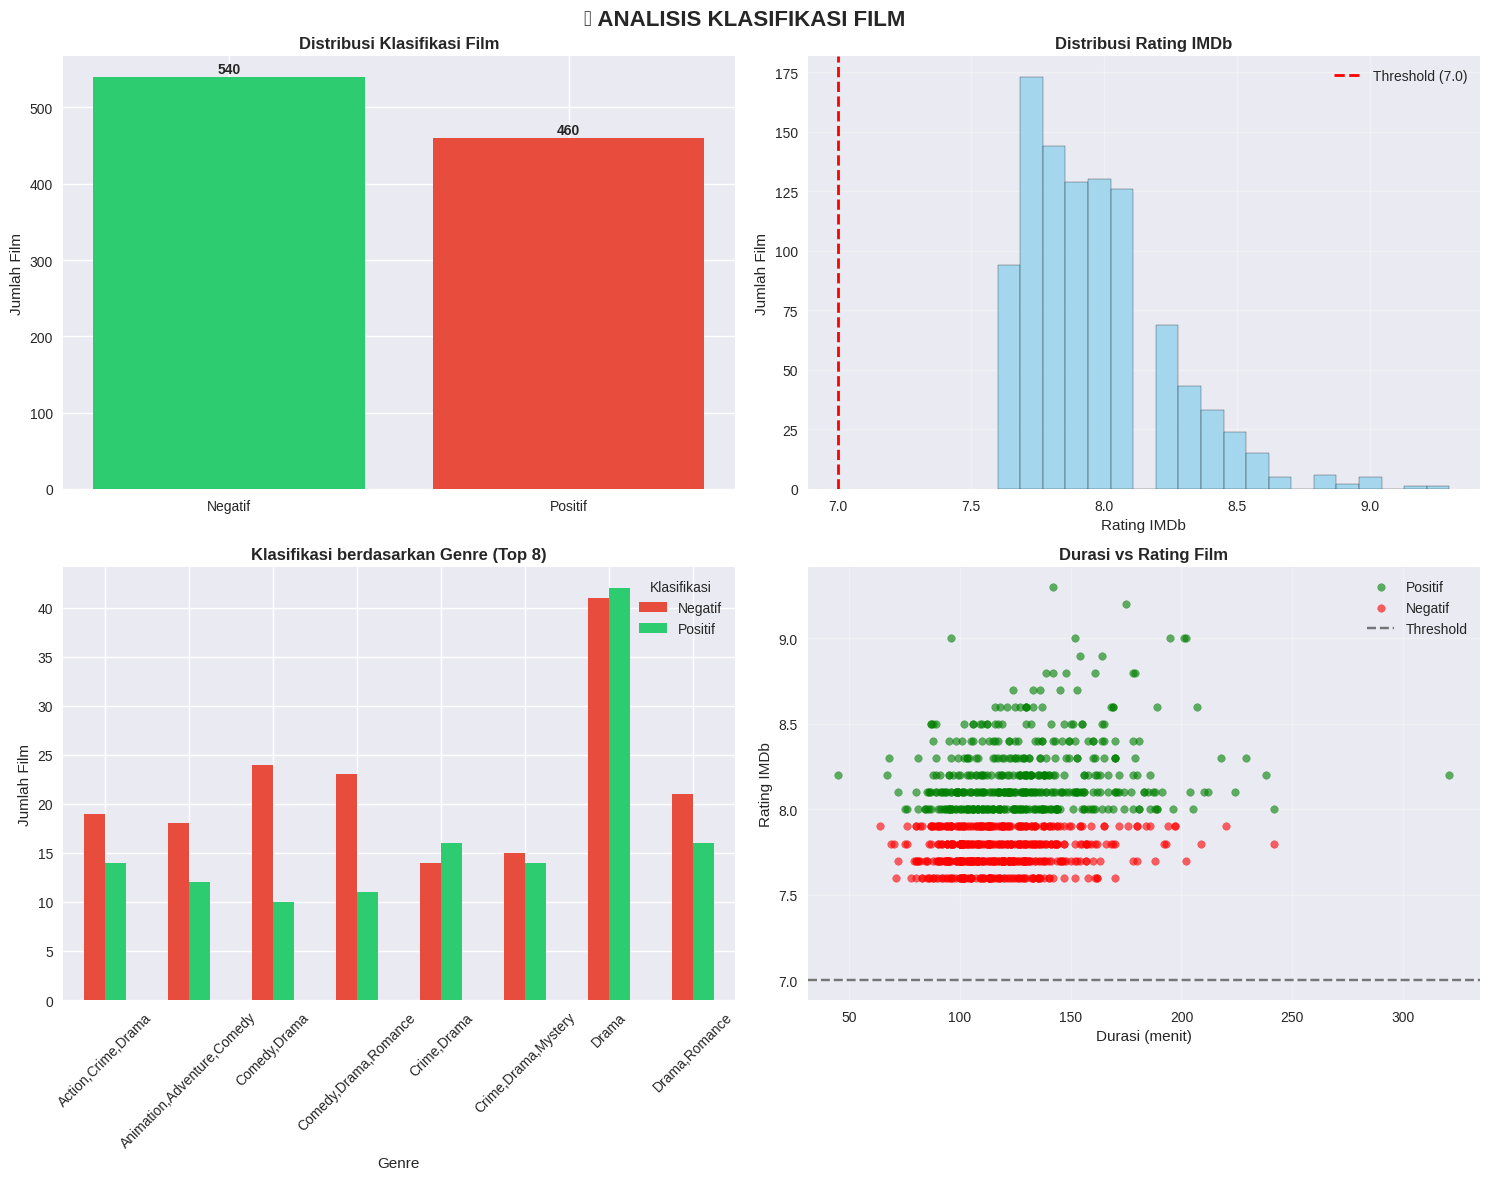

📈 STATISTIK DETAIL:
   Rata-rata rating: 7.96
   Median rating: 7.90
   Rating tertinggi: 9.3
   Rating terendah: 7.6

📋 SAMPLE AI ANALYSIS RESULTS:
------------------------------------------------------------

🎬 Top Gun: Maverick
   📊 8.6/10 (Positif)
   🎭 Action,Drama | ⏱️ 130.0 min
   🤖 AI Analysis: Pada saat ini, skor 8.6/10 untuk film "Top Gun: Maverick" membuatnya diklasifikasikan sebagai "Positif" karena melebihi batas yang dikenakan untuk kategori ini (≥8.0). Dalam konteks genre Action dan Drama, skor ini menunjukkan film tersebut telah menerima respon positif dari penonton dan kritikus. Panjang waktu 130.0 menit, secara umum, cocok untuk genre ini yang biasanya membutuhkan waktu yang cukup untuk membangun plot dan tindakan dramatis. Pendapat kritikus dan respon publik positif, serta kemampuan Tom Cruise dan cast lainnya dalam menampilkan performa yang kuat, membuktikan kemampuan pengarah Joseph Kosinski dalam mengembangkan film dengan tingkat kualitas tinggi, yang sesuai denga

In [13]:
results, chatbot = run_optimized_granite_project(
    df,
    sample_size=None,
    config_type="optimized"
)

start_interactive_chat_session(chatbot, max_questions=10)